# DS-SF-23 | Codealong 05 | Inferential Statistics for Model Fit

## Inferential Statistics | Motivating Example

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pylab as pl

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')



# imports
# from __future__ import division
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import pylab as pl
# %matplotlib inline
# plt.style.use('ggplot')

In [74]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-05-start.csv'), index_col = 'ID')

We are using our usual SF housing dataset but we added two new variables `M1` and `M2` to it.

In [75]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,...,550.0,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,...,1430.0,2435.0,1948.0,3.687657,0.430379
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,...,2040.0,3920.0,1976.0,8.975475,0.205527
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,...,1060.0,NaN,1930.0,2.317325,0.089766
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,...,1299.0,NaN,1993.0,1.380945,-0.152690
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,...,264.0,NaN,2012.0,0.428094,-0.804647
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,...,691.0,NaN,2004.0,1.302833,0.029844
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,...,1738.0,2299.0,1976.0,1.608882,0.876824


### Exploratory Analysis on `M1` and `M2` and how they relate to `SalePrice`

In [76]:
df_mystery = df [['M1','M2','SalePrice']]
df_mystery 

,M1,M2,SalePrice
ID,,,
15063471,1.099658,0.097627,710000.0
15063505,3.687657,0.430379,2150000.0
15063609,8.975475,0.205527,5600000.0
15064044,2.317325,0.089766,1500000.0
15064257,1.380945,-0.152690,970000.0
...,...,...,...
2124214951,0.428094,-0.804647,390000.0
2126960082,1.302833,0.029844,860000.0
2128308939,1.608882,0.876824,830000.0


In [77]:
df_mystery.describe()

,M1,M2,SalePrice
count,1000.000000,1000.000000,1.000000e+03
mean,2.101532,-0.008157,1.397423e+06
std,2.803823,0.581489,1.736413e+06
min,0.000002,-0.998908,1.000000e+00
25%,1.140770,-0.504773,8.000000e+05
50%,1.595360,-0.037355,1.100000e+06
75%,2.340724,0.474521,1.532500e+06
max,61.532746,0.999617,3.270000e+07


In [78]:
df.corr()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear,M1,M2
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598,0.970612,0.022003
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258,0.004113,-0.043870
BedCount,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700,0.370483,0.001504
BathCount,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157,0.323544,-0.004046
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989,0.434626,0.015807
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411,0.290286,0.005383
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000,-0.146299,-0.022441
M1,0.970612,0.004113,0.370483,0.323544,0.434626,0.290286,-0.146299,1.000000,0.166624
M2,0.022003,-0.043870,0.001504,-0.004046,0.015807,0.005383,-0.022441,0.166624,1.000000


In [79]:
df_mystery.corr()

,M1,M2,SalePrice
M1,1.000000,0.166624,0.970612
M2,0.166624,1.000000,0.022003
SalePrice,0.970612,0.022003,1.000000


In [80]:
df [['M1','M2','SalePrice']].corr()

,M1,M2,SalePrice
M1,1.000000,0.166624,0.970612
M2,0.166624,1.000000,0.022003
SalePrice,0.970612,0.022003,1.000000


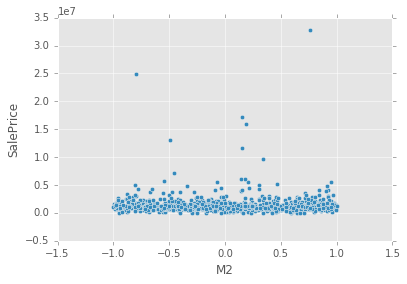

In [81]:
df.plot(x = 'M2', y = 'SalePrice', kind = 'scatter')

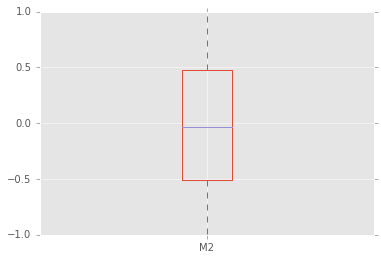

In [82]:
df.M2.plot(kind='box')

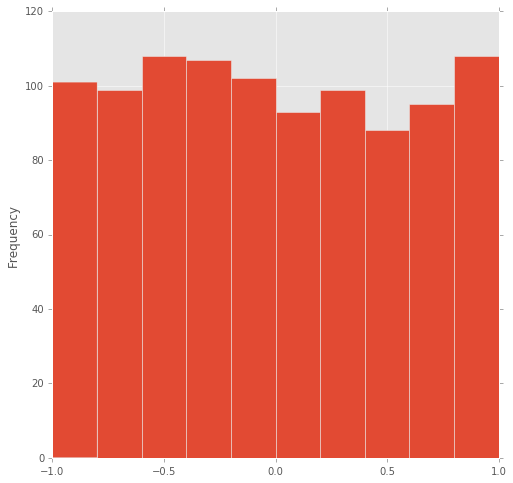

In [83]:
# df_mystery.M2.plot.hist()
df.M2.plot(kind='hist', figsize = (8,8))

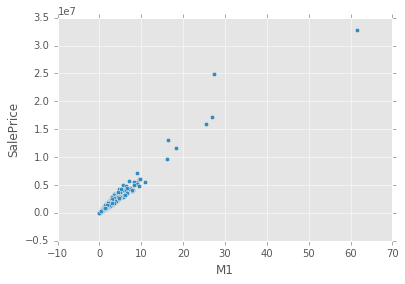

In [84]:
df.plot(x = 'M1', y = 'SalePrice', kind = 'scatter')

In [85]:
# trying to plot slope of M1 and saleprice on x & y axis -- df [['M1','SalePrice']].plot(x=0, y=0, kind='scatter') 

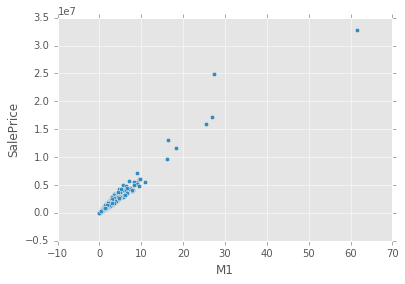

In [91]:
df [['M1','SalePrice']].plot(x=0, y=1, kind='scatter') 

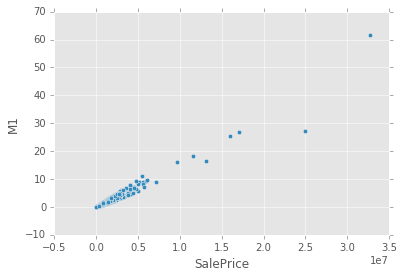

In [93]:
df [['M1','SalePrice']].plot(x=1, y=0, kind='scatter') 

### Your first Machine Learning Models!

#### Machine Learning Model #1 | `SalePrice` as a function of `M1`

In [70]:
X = df[ ['M1'] ] #always want x to be a dataframe
y = df.SalePrice #always want y to be a series 
#(use dot notation to eliminate confusion) - using series trying to predict single outcome 

model = smf.OLS(y, X).fit() #smf=start modal formula? 

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.567e+04
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        20:10:38   Log-Likelihood:                -14393.
No. Observations:                1000   AIC:                         2.879e+04
Df Residuals:                     999   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M1          6.241e+05   3894.990    160.228      0.000      6.16e+05  6.32e+05
==============================================================================
Omnibus:                     1044.296   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901486.247
Skew:                           3.948   Prob(JB):                         0.00
Kurtosis:                     149.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Machine Learning Model #2 | `SalePrice` as a function of `M2`

In [94]:
X = df[ ['M2'] ] #always want x to be a dataframe
y = df.SalePrice #always want y to be a series 
#(use dot notation to eliminate confusion) - using series trying to predict single outcome 

model = smf.OLS(y, X).fit() #smf=start model formula? 

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Thu, 19 May 2016   Prob (F-statistic):              0.792
Time:                        20:22:34   Log-Likelihood:                -16036.
No. Observations:                1000   AIC:                         3.207e+04
Df Residuals:                     999   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M2          3.195e+04   1.21e+05      0.263      0.792     -2.06e+05   2.7e+05
==============================================================================
Omnibus:                     1664.600   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986904.813
Skew:                          10.532   Prob(JB):                         0.00
Kurtosis:                     155.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# how to create dataframe with M1 & M2 coef values